### MNIST
https://www.kaggle.com/code/jedrzejdudzicz/mnist-dataset-100-accuracy#Experimenting-on-MNIST

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems

The MNIST database contains 60,000 training images and 10,000 testing images. Photo size: 28x28 p.

In [107]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  Dropout, Conv1D,MaxPooling1D,Flatten
from keras.layers import Flatten
from sklearn import metrics
from sklearn.metrics import accuracy_score

#### Step 1: Load data

In [12]:

Train_Set_Orig = pd.read_csv("Data/train.csv")
Test_Set_Orig = pd.read_csv("Data/test.csv")
print(Train_Set_Orig.head())
print(Test_Set_Orig.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

##### Q1 - Check data dimension?

In [13]:
print(Train_Set_Orig.shape)
print(Test_Set_Orig.shape)

(42000, 785)
(28000, 784)


##### Q2 - Why did they have a 1 column gap? and what is that?

In [14]:
Train_Set_Orig.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
Test_Set_Orig.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### <u>Answer:</u> Test Set has been set up for competition! So, do not use the real test set!

### Step 2: Split data

In [29]:
#2.1 Sizing
TrainSize=0.9
DevSize=0.05
TrainSize = int(TrainSize*len(Test_Set_Orig))
DevSize=int(DevSize*len(Test_Set_Orig))
TestSize=len(Test_Set_Orig)-TrainSize-DevSize
print("Size of data; Train/Dev/Test {}/{}/{}.".format(TrainSize,DevSize,TestSize))

Size of data; Train/Dev/Test 25200/1400/1400.


In [ ]:
#2.2 Shuffle and random
AllIndex=np.random.permutation(len(Test_Set_Orig))
TrainIndex=AllIndex[0:TrainSize]
DevIndex=AllIndex[TrainSize:(TrainSize+DevSize)]
TestIndex=AllIndex[TrainSize+DevSize:]
TrainSet=Train_Set_Orig.take(TrainIndex)
DevSet=Train_Set_Orig.take(DevIndex)
TestSet=Train_Set_Orig.take(TestIndex)
print("Size of Real Data; Train/Dev/Test {}/{}/{}.".format(TrainSet.shape,DevSet.shape,TestSet.shape))

Size of Real Data; Train/Dev/Test (25200, 785)/(1400, 785)/(1400, 785).


In [37]:
#2.3 drop label from training set and set y from label column
Y_Train = TrainSet["label"]
X_Train = TrainSet.drop(labels = ["label"],axis = 1) 
display(Y_Train)
display(X_Train)

16738    9
10670    1
4711     4
11997    1
4984     9
        ..
17258    9
4289     2
1566     7
20980    7
23697    7
Name: label, Length: 25200, dtype: int64

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
16738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#2.4 count and show freq plot

Y_Train_Stat = Y_Train.value_counts().rename_axis('label').reset_index(name='counts')
print(Y_Train_Stat)


   label  counts
0      1    2764
1      7    2619
2      3    2591
3      2    2538
4      6    2538
5      4    2507
6      9    2494
7      0    2459
8      8    2421
9      5    2269


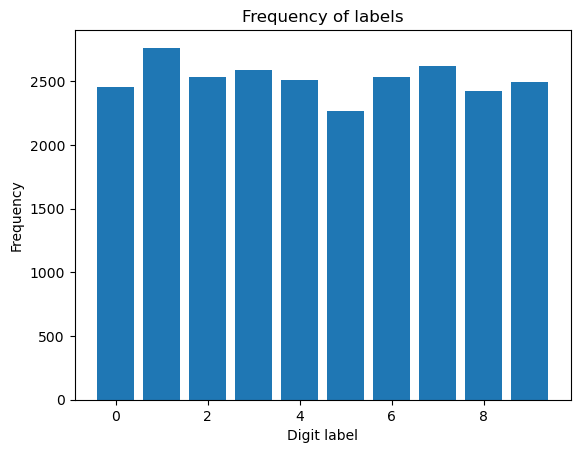

In [43]:
#2.5 Figure plot
plt.bar(Y_Train_Stat['label'], Y_Train_Stat['counts'])
plt.title('Frequency of labels')
plt.xlabel('Digit label')
plt.ylabel('Frequency')
plt.show()

Ransom row: 21,995


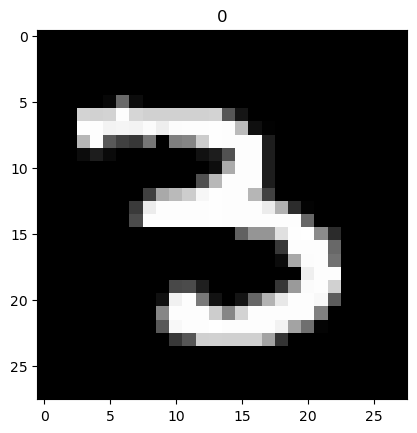

In [63]:
# 2.6 Grey - Sample image
RandomPicture=random.randint(0,X_Train.shape[0])
print("Ransom row: {:,}".format(RandomPicture))
img = X_Train.iloc[RandomPicture].values
Size_img =math.sqrt(X_Train.shape[1])
img = img.reshape((int(Size_img),int(Size_img)))
plt.imshow(img,cmap='gray')
plt.title(X_Train.iloc[RandomPicture,0])
plt.show()

#### Step 3: AI creation

In [114]:
#3.1 AI creation model CNN
EpochNum=5
filtersize=10
filtered_train = np.reshape(X_Train,(X_Train.shape[0],X_Train.shape[1],1))
Y_Train_pre_HOT=Y_Train
Y_Train_OHE= tf.one_hot(np.reshape(Y_Train_pre_HOT,X_Train.shape[0]),10)


In [116]:
#3.2 CNN MODEL
model_cnn_wide = Sequential()
model_cnn_wide.add(Conv1D(filters=filtersize, kernel_size=filtered_train.shape[1]-1, input_shape=(filtered_train.shape[1], filtered_train.shape[2])))
model_cnn_wide.add(MaxPooling1D(pool_size=1 ))
model_cnn_wide.add(Flatten())
model_cnn_wide.add(Dense(1000, activation='relu'))
model_cnn_wide.add(Dense(10, activation='softmax'))
model_cnn_wide.compile(loss='CategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_wide.summary()
history_cnn_wide_non_standardize=model_cnn_wide.fit(x=X_Train, y=Y_Train_OHE, epochs=EpochNum)
yhat_cnn_wide_non_standardize = model_cnn_wide.predict(X_Train)
print("Non standardize model, the best accuracy={:.3f}".format(history_cnn_wide_non_standardize.history['accuracy'][-1]))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 2, 10)             7840      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 2, 10)            0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 1000)              21000     
                                                                 
 dense_9 (Dense)             (None, 10)                10010     
                                                                 
Total params: 38,850
Trainable params: 38,850
Non-trainable params: 0
__________________________________________________

In [118]:
#3.3 Comparison between Real and Predict Label
Y_Train_Hat=np.argmax(yhat_cnn_wide_non_standardize,1)
ComparisonTable=pd.DataFrame({'Real_Label':Y_Train_pre_HOT,'Predict_Label':Y_Train_Hat})
display(ComparisonTable)

,Real_Label,Predict_Label
16738,9,9
10670,1,1
4711,4,4
11997,1,1
4984,9,9
...,...,...
17258,9,9
4289,2,2
1566,7,7
20980,7,7


Model's accuracy: 0.948


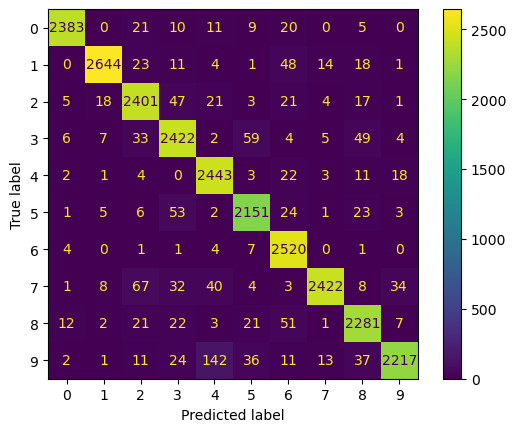

In [119]:
#3.4 Confusion matrix 
cm = metrics.confusion_matrix(
                    ComparisonTable['Real_Label'], 
                    ComparisonTable['Predict_Label'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = list(range(0,10)))
cm_display.plot()
acc_score=accuracy_score(ComparisonTable['Real_Label'], ComparisonTable['Predict_Label'])
print("Model's accuracy: {:.3f}".format(acc_score))

In [125]:
#3.2 CNN MODEL
EpochNum=10
model_cnn_new = Sequential()
model_cnn_new.add(Dense(512, input_dim=X_Train.shape[1], activation='relu')),
model_cnn_new.add(Dropout(0.1))
model_cnn_new.add(Dense(256, activation='relu'))
model_cnn_new.add(Dropout(0.1))
model_cnn_new.add(Dense(128, activation='relu'))
model_cnn_new.add(Dense(10, activation='softmax'))
model_cnn_new.compile(loss='CategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_new.summary()
history_cnn_new=model_cnn_new.fit(x=X_Train, y=Y_Train_OHE, epochs=EpochNum)
yhat_cnn_new = model_cnn_new.predict(X_Train)
print("New model, the best accuracy={:.3f}".format(history_cnn_new.history['accuracy'][-1]))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               32896     
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-tr

In [ ]:
#Homework:
# Make sequential models
# Dense 1024 (activation=sigmoid)-> Dropout 20% ->Dense 128(activation=tanh) -> Dropout 30% -> Dense 512(activation=relu)
# ->Dense 10(softmax)
# Calculate the accuracy
# Which model is the best?


Epoch 1/5
788/788 [==============================] - 4s 4ms/step - loss: 2.3290 - accuracy: 0.8259
Epoch 2/5
788/788 [==============================] - 3s 3ms/step - loss: 0.3982 - accuracy: 0.9051
Epoch 3/5
788/788 [==============================] - 3s 3ms/step - loss: 0.2867 - accuracy: 0.9254
Epoch 4/5
788/788 [==============================] - 3s 3ms/step - loss: 0.2150 - accuracy: 0.9415
Epoch 5/5
788/788 [==============================] - 1s 1ms/step
New model, the best accuracy=0.945


In [126]:
# Optional
# Calculate F1 score for both models
# Compare F1 from both models